In [190]:
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [191]:
data = pd.read_csv("bank-full.csv", sep=";")
df = data.copy()

In [192]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 500)


In [193]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## data clean

In [194]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype='object')

In [195]:
for var in df.columns:
    print(f"""

{var}:
""")
    print(df[var].value_counts())




age:

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
71      54
67      54
72      52
20      50
73      44
77      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
86       9
84       9
85       5
87       4
89       3
92       2
93       2
90       2
95       2
88       2
94       1
Name: age, dtype: int64


job:

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
ret

In [196]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [197]:
df_job = pd.get_dummies(df["job"], drop_first=True)
df_job = df_job.rename(columns={"unknown":"unknown_job"}) 
df = pd.concat([df, df_job], axis=1)
df = df.drop("job", axis=1)


In [198]:
df_maritial = pd.get_dummies(df["marital"], drop_first=True)
df = pd.concat([df, df_maritial], axis=1)
df = df.drop("marital", axis=1)


In [199]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [200]:
df_education = pd.get_dummies(df["education"], drop_first=True)
df_education = df_education.rename(columns={"unknown":"unknown_education", "primary":"primary_school", "secondary":"secondary_school","tertiary": "tertiary_school" }) 
df = pd.concat([df, df_education], axis=1)
df = df.drop("education", axis=1)

In [201]:
df["default"] = df["default"].map({"no":0, "yes":1})

In [202]:
df["housing"] = df["housing"].map({"no":0, "yes":1})

In [203]:
df["loan"] = df["loan"].map({"no":0, "yes":1})

In [204]:
df_contact = pd.get_dummies(df["contact"], drop_first=True)
df_contact = df_contact.rename(columns={"unknown":"unknown_contact", "cellular":"contact_cellular", "telephone":"contact_telephone"}) 
df = pd.concat([df, df_contact], axis=1)
df = df.drop("contact", axis=1)

In [205]:
df["month"] = df["month"].map({
"jan":1,
"feb":2,
"mar":3,
"apr":4,
"may":5,
"jun":6,
"jul":7,
"aug":8,
"sep":9,
"oct":10,
"nov":11,
"dec":12
})

In [206]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [207]:
df_poutcome = pd.get_dummies(df["poutcome"], drop_first=True)
df_poutcome = df_poutcome.rename(columns={"unknown":"unknown_poutcome", "failure":"poutcome_failure", "other":"poutcome_other","success":"poutcome_success"}) 
df = pd.concat([df, df_poutcome], axis=1)
df = df.drop("poutcome", axis=1)

In [208]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_job,married,single,secondary_school,tertiary_school,unknown_education,contact_telephone,unknown_contact,poutcome_other,poutcome_success,unknown_poutcome
0,58,0,2143,1,0,5,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


## eda

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   default            45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   housing            45211 non-null  int64 
 4   loan               45211 non-null  int64 
 5   day                45211 non-null  int64 
 6   month              45211 non-null  int64 
 7   duration           45211 non-null  int64 
 8   campaign           45211 non-null  int64 
 9   pdays              45211 non-null  int64 
 10  previous           45211 non-null  int64 
 11  y                  45211 non-null  object
 12  blue-collar        45211 non-null  uint8 
 13  entrepreneur       45211 non-null  uint8 
 14  housemaid          45211 non-null  uint8 
 15  management         45211 non-null  uint8 
 16  retired            45211 non-null  uint8

In [210]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 40.9 (10.6)min < med < max:18.0 < 39.0 < 95.0IQR (CV) : 15.0 (3.9),77 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC+UlEQVR4nO3dPU/bUBSA4XMTEjkhuo6VFrYsHTIgdWDM0n/Aj+3ajYEdKWuGKhsCnKC4mDi2O7VLIeBru/Gx3me/5g6vDAd/mTzPBWi6zrE3AHzEybE3cIgxZiAifcfluzzPn6vcD46nsaEaYwaTyeTKWhu4rH96egqNMd+JtR0aG6qI9K21wXw+f/Z9Py6ycLPZeDc3N8HDw0NfRAi1BZocqoiI+L4fn52d/XJYOqh8MzgahimoQKhQodZf/SWndptlWa/K/UCv2kItO7UnSeKlaXoRx/G1iLj8jYoWqfOM6jy1i4isVqtgsVgM9/t9t47NQZfap37XqT0MQ6Z2/MUwBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCo1/XNpVmqY9EbHGGNdD8KaVBmllqFEU9ZIk+TqdTrvdbrfwYzAivGmlaVoZ6m63O/E8b3h5eRmfn5+HRdfzppXmaWWof5yenrq+ZUWEN600CsMUVGj1GbWMksMYg1jFCPUVZYcxBrHqEeorygxjDGL1INQDSgxjDGIVY5iCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKEC96PWgMdYqkeoFeMxlnoQasV4jKUehFoTHmOpFsMUVCBUqECoUIFQoQKhQgVChQrv/nvKGDMQkb7DsW2WZT2HdcA/DoZqjBlMJpMra21Q9MBJknhpml7EcXwtIq7vKAVE5P0zat9aG8zn82ff9wtdDlytVsFisRju9/tuif0BIvLBK1O+7xe+yhKGIVdYUBmGKajAtf6GqeCzQx0RyRzXNvYWQ0JtkLK3CKZp2oui6MtoNFp2Op2k6Pr1er01xvwQEadPHkmNoX8o1M1m4xU98Ha79UREoijy7u7uhv9zvdaf/fj4OPI8bzibzcx4PH4pslZE5P7+3lsul59ns9nP8Xi8LbJ2vV6Pbm9vv02n00+u3+YqGfpLnudvrvsNWZ5IF7PWZn0AAAAASUVORK5CYII="">",0(0.0%)
2,default[int64],Mean (sd) : 0.0 (0.1)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.1),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABiElEQVR4nO3XQWrbUBSG0XeLMTYUCdvgxXjeaRebRXg3JkiDOgTM66yTkDpWBulfzplK9+oNPiRUvfcG/7pvX30A+IjVvRuqattaWy/c/9p7vy6chT/+GmpVbQ+Hw89hGHZLls/z/FxVT2Lls+69UdfDMOxOp9N1HMeXRxZP07Q5n8+7y+Wybq0JlU+5++lvrbVxHF+Ox+OvBfu3C2bgDT9TRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEVZffQD+H1W1ba2tF46/9t6v7138UKjTNG0efeo0TZvb7bZqrQ1V9eg4eTb7/f7HOI7flwzP8/xcVU/vxfob+a03MHU2LOMAAAAASUVORK5CYII="">",0(0.0%)
3,balance[int64],Mean (sd) : 1362.3 (3044.8)min < med < max:-8019.0 < 448.0 < 102127.0IQR (CV) : 1356.0 (0.4),"7,168 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB2klEQVR4nO3ZQWrCQBSH8Tc1yqiQIELceYQuXHqIHtZD5DBCkAlG00iY7roprSYq7Z9+v3XeYxYfCaMuxmjAX/fy2wcAbpFce8A5NzWzycD9bYzxPHAW+PRjqM656XK5fEvTdDFkeVVVB+fcjlhxr2tv1EmapovtdnvOsqzpsziE4IuiWJRlOTEzQsVdrn76zcyyLGvyPD8N2D8dMAN8wWUKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEpJnLu+6bmxmqXNu6Io2xnh+4JEg6mmh1nU9vlwur+v1ejQajZohO6qqOjjndsSKp4Xatm3ivZ9tNptmtVod+s6HEHxRFIuyLCdmRqj/3FM//WZm8/m8yfP8NHB8+tDDQBaXKUggVEggVEggVEggVEi46dYfQvB9Fx+PR29mVte13+/3s77zIQTfdV1i9/1hAB3vMcZvf2//AO+nX4nay4MUAAAAAElFTkSuQmCC"">",0(0.0%)
4,housing[int64],Mean (sd) : 0.6 (0.5)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 1.0 (1.1),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABeklEQVR4nO3aQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVCloegJrFIP9yvNsJxNm8RIY8tdhGAr8dW+vPgCMMXv1Afg/aq3LUsr8we3fwzAcry0KlaeotS7X6/V713WrR/YfDofPWuvHtViFyrPMu65bbbfbY9/3p3s2ttYWu91utd/v56UUoTK9vu9Pm83m64Gty98WXaaIIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUItz8hTrlRAyM9WuoU0/EwFi3vqiTTsTAWKOmp6aaiIGxXKaIIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIg

In [211]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [212]:
df["y_"] = df["y"].map({"yes":0,"no":1})

<Axes: xlabel='previous', ylabel='previous'>

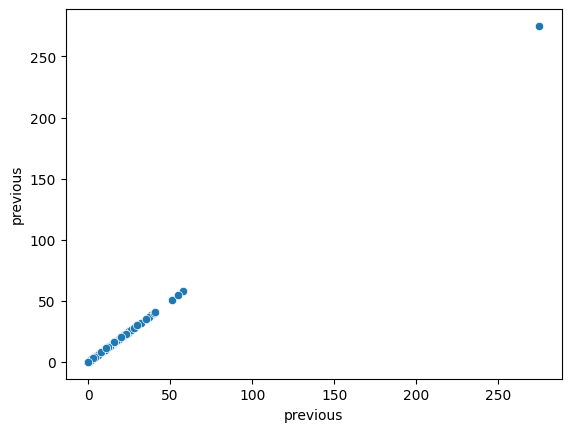

In [213]:
sns.scatterplot(data=df,x="previous", y="previous")

In [214]:
#sns.pairplot(data=df, hue="y")

---

C:\Users\lucam\AppData\Local\Temp\ipykernel_25840\1510691546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<Axes: >

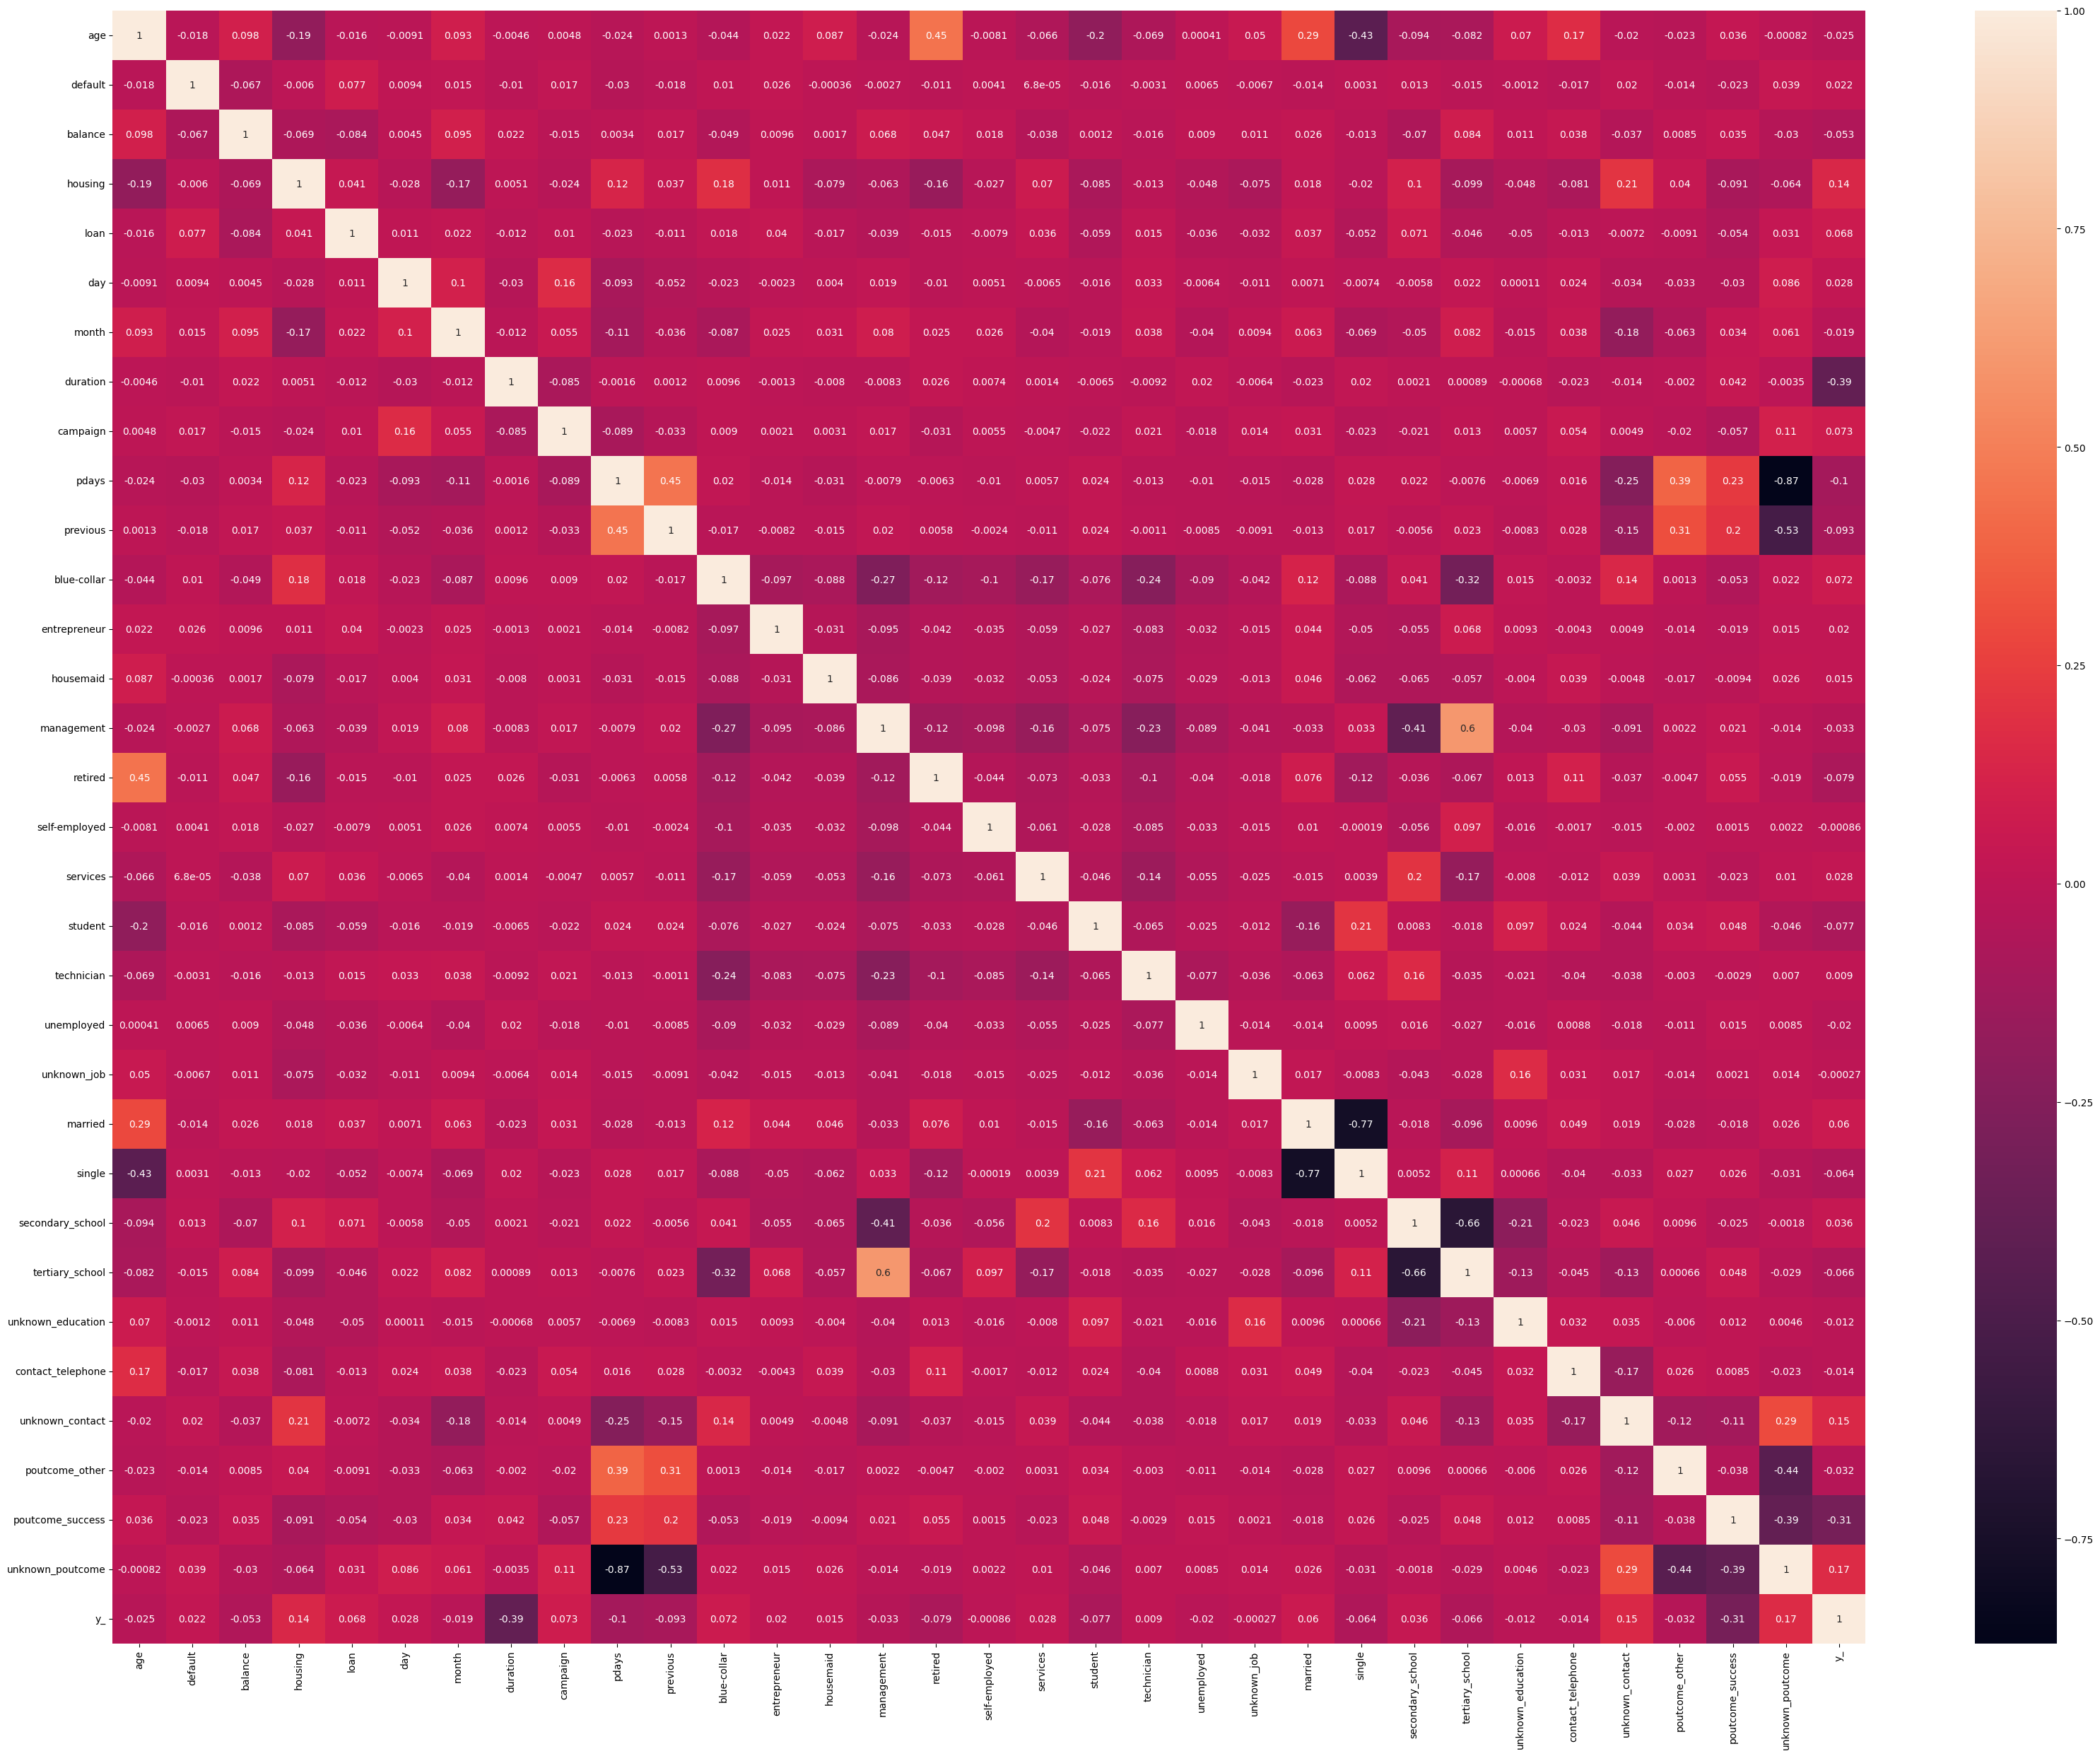

In [215]:
plt.figure(figsize=(40,30))
sns.heatmap(data=df.corr(), annot=True)


## model 

In [216]:
x = df.corr() > 0.01

C:\Users\lucam\AppData\Local\Temp\ipykernel_25840\3425158196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = df.corr() > 0.01


In [217]:
x["y_"]

age                  False
default               True
balance              False
housing               True
loan                  True
day                   True
month                False
duration             False
campaign              True
pdays                False
previous             False
blue-collar           True
entrepreneur          True
housemaid             True
management           False
retired              False
self-employed        False
services              True
student              False
technician           False
unemployed           False
unknown_job          False
married               True
single               False
secondary_school      True
tertiary_school      False
unknown_education    False
contact_telephone    False
unknown_contact       True
poutcome_other       False
poutcome_success     False
unknown_poutcome      True
y_                    True
Name: y_, dtype: bool

C:\Users\lucam\AppData\Local\Temp\ipykernel_25840\93819946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


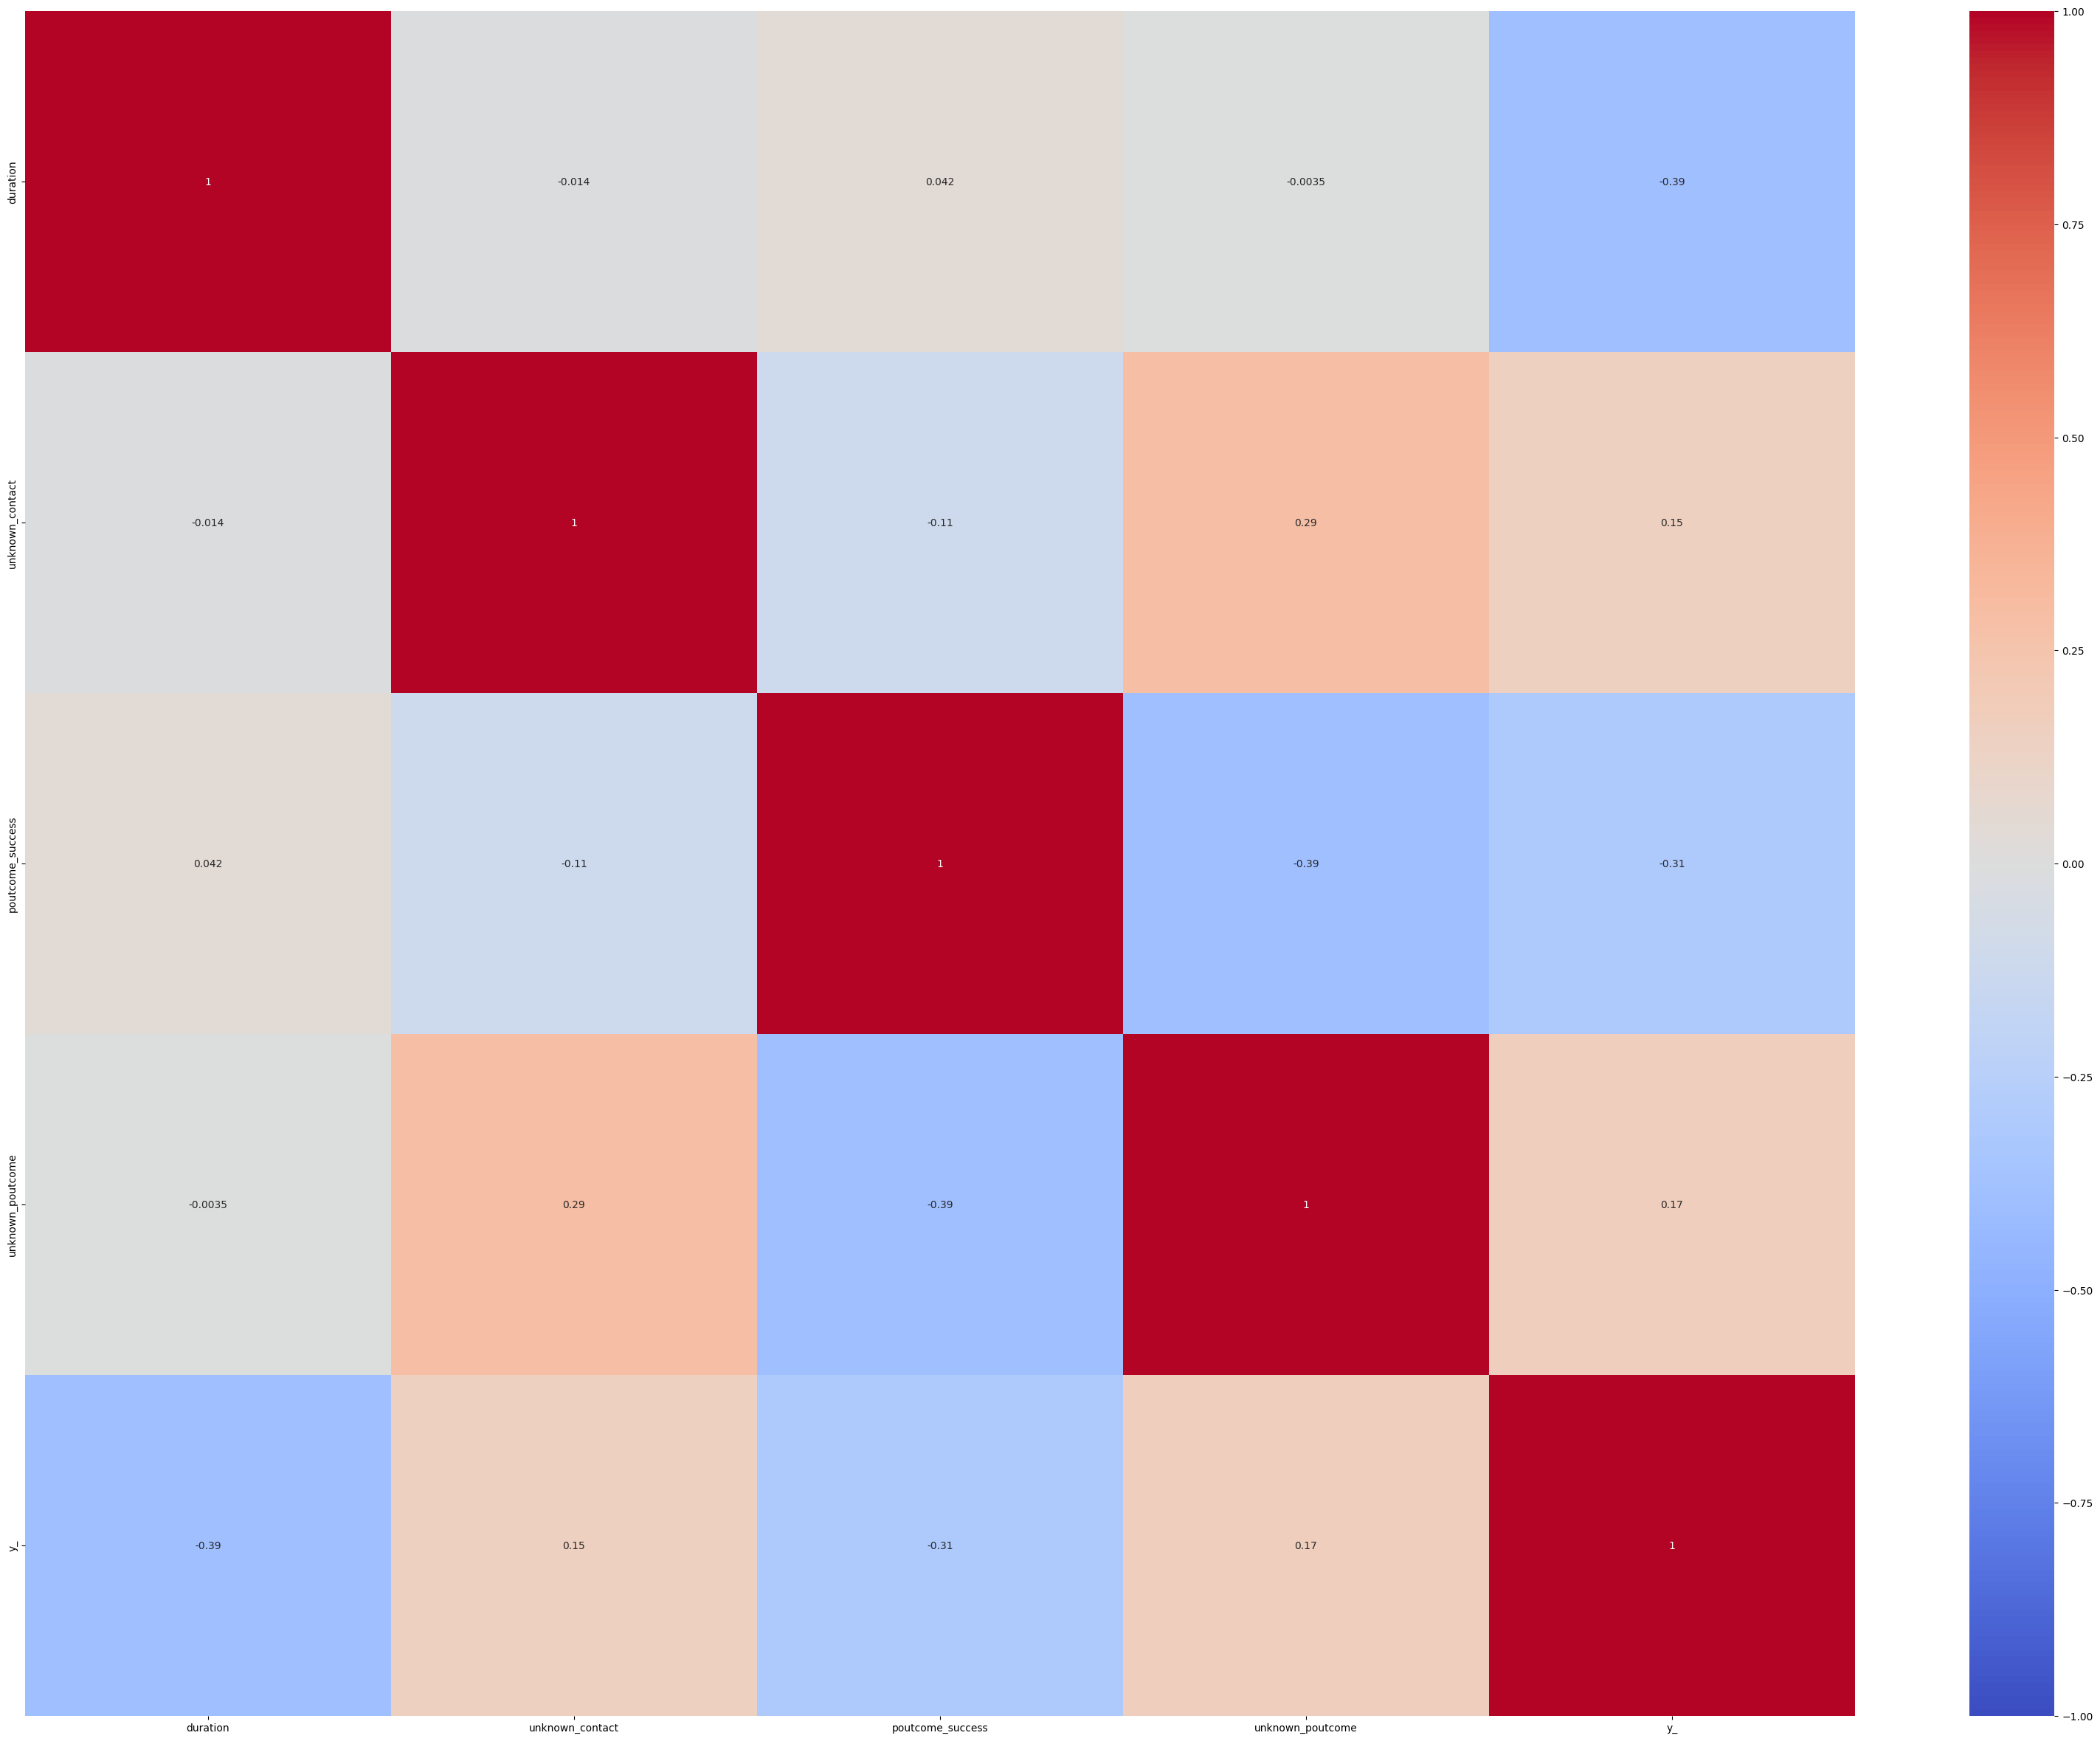

In [218]:
target = "y_"
correlation_matrix = df.corr()

target_corr = correlation_matrix[target]
high_corr_features = target_corr[abs(target_corr) > 0.15].index

filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

plt.figure(figsize=(40, 30))

sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.show()

In [219]:
high_corr_features

Index(['duration', 'unknown_contact', 'poutcome_success', 'unknown_poutcome', 'y_'], dtype='object')

In [220]:
X = df[high_corr_features].drop("y_", axis=1)
y = df["y"]

In [221]:
model = LogisticRegression()

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=667, stratify=y)

In [223]:
model.fit(X_train, y_train)

LogisticRegression()

In [224]:
y_pred_prob = model.predict_proba(X_test)

In [225]:
y_pred_prob

array([[0.93502786, 0.06497214],
       [0.98422561, 0.01577439],
       [0.95657702, 0.04342298],
       ...,
       [0.95006232, 0.04993768],
       [0.91109916, 0.08890084],
       [0.97245179, 0.02754821]])

In [226]:
y_pred = model.predict(X_test)

In [227]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [228]:
accuracy_score(y_test, y_pred)

0.9017959833672476

In [229]:
y_train_pred = model.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9006134245605757

In [230]:
0.9043616738918872

0.9043616738918872

In [231]:
cross_val_score(model,X,y,cv=5).mean()

0.8915969861902152

In [232]:
0.8915969861902152

0.8915969861902152

In [233]:
x = df[['duration', 'unknown_contact', 'poutcome_success', 'unknown_poutcome', 'y_']]

In [234]:
x["y"] = x["y_"]

C:\Users\lucam\AppData\Local\Temp\ipykernel_25840\4072151497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["y"] = x["y_"]


In [235]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   duration          45211 non-null  int64
 1   unknown_contact   45211 non-null  uint8
 2   poutcome_success  45211 non-null  uint8
 3   unknown_poutcome  45211 non-null  uint8
 4   y_                45211 non-null  int64
 5   y                 45211 non-null  int64
dtypes: int64(3), uint8(3)
memory usage: 1.2 MB


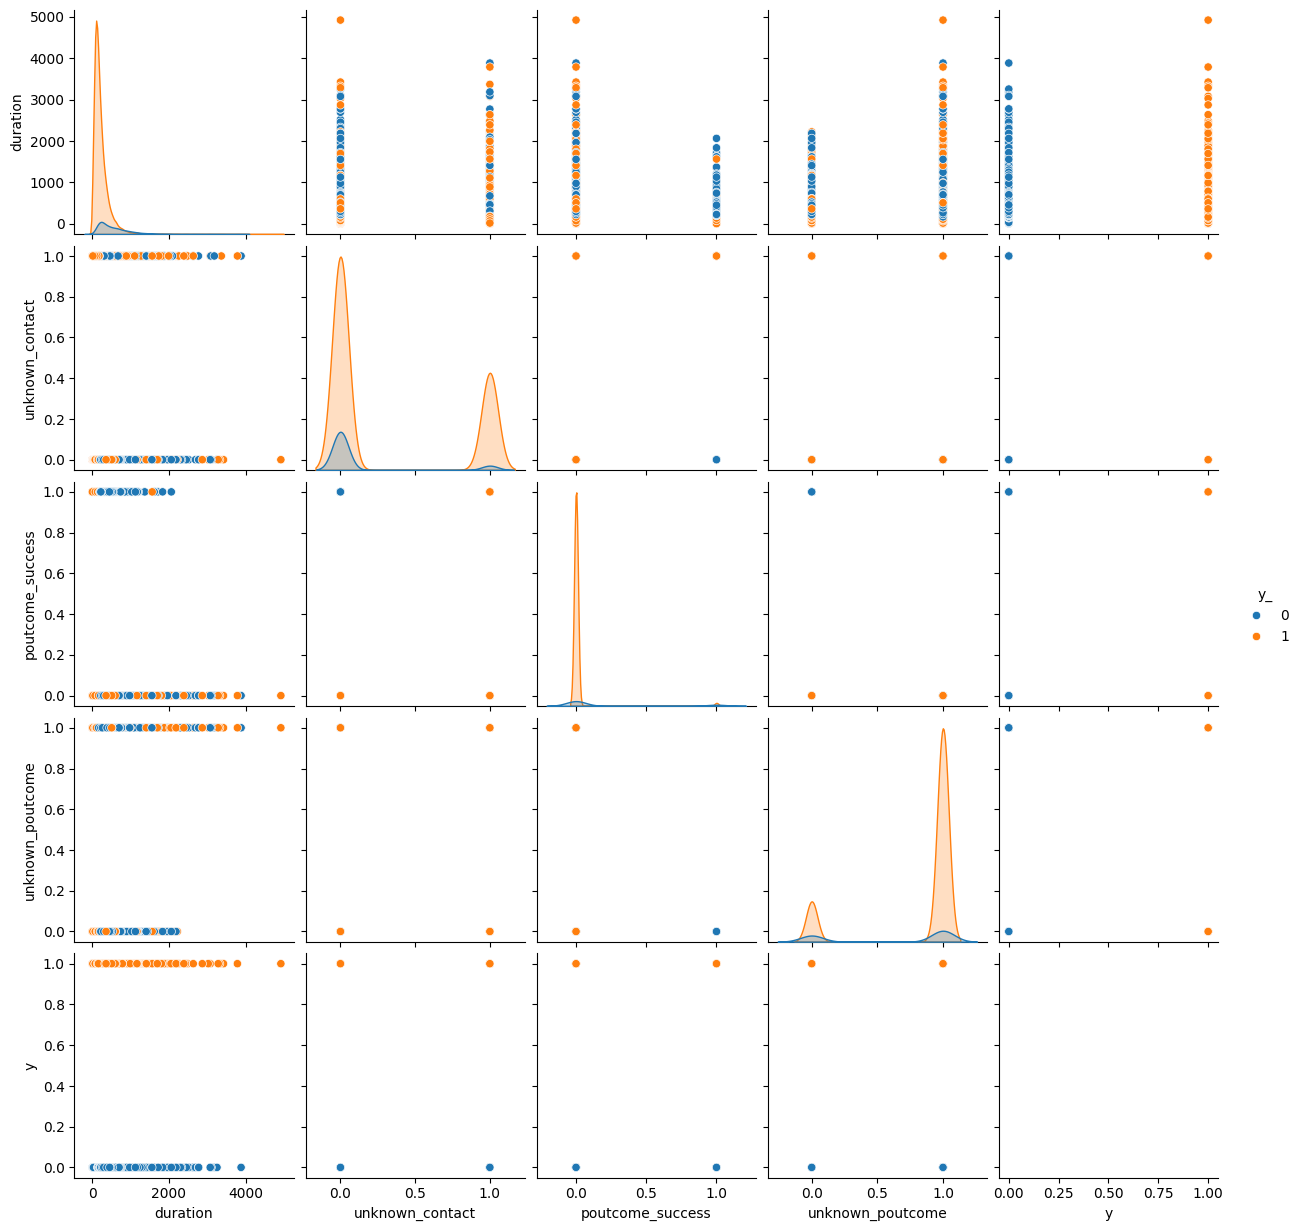

In [236]:
sns.pairplot(data = x, hue = "y_")

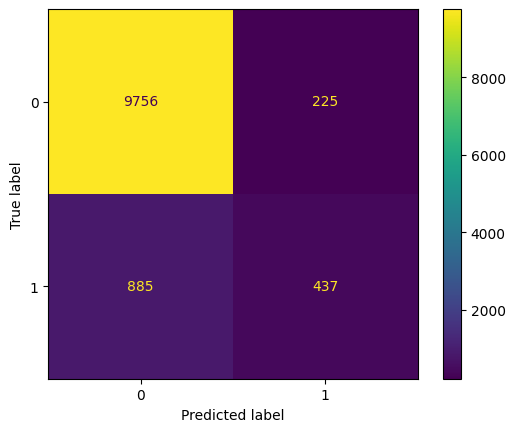

In [237]:
from sklearn import metrics

y_test
y_pred

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [238]:
9780 442 

SyntaxError: invalid syntax (521855644.py, line 1)

In [ ]:
from sklearn.metrics import classification_report

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      9981
         yes       0.66      0.33      0.44      1322

    accuracy                           0.90     11303
   macro avg       0.79      0.65      0.69     11303
weighted avg       0.89      0.90      0.89     11303

